# Project: Brazil medical appointment no show analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This project will analyze the data from the kaggle no show medical appointment dataset.  The analysis will be investigating what trends lead to a person not showing up for their medical appointment.

In [1]:
#import libraries needed to perform analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> The below section will involve loading the .csv file and looking at the content to understand structure, data-types, missing information and anomolies.  I will then start to manipulate the dataset based on observations.

### General Properties


In [2]:
# use panda to read in noshowappointments-kagglev2-may-2016.csv
df_noshow_data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#  use info method to examine data for datatypes, missing values, number of rows, columnt headings.
df_noshow_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>Info is a very useful method to understand the dataset. I noticed right away the date columns (scheduedDay and appointmentDay) were objects which generally means they are strings.  I see that the No-show column is a string in order for me to do my analysis I will need to make this into a datatype similar to the int64 columns (Schiolarship, Hipertension, etc).  I also note there are no missing values and all rows have data.  the dataset has 14 columns and 110527 rows.  It is clear to me that PatientID and AppointmentID are used as primary keys and will add no value to the analysis of the data set.  I will also make all column names lower case and fix No-show to no_show.

In [3]:
# Use head method to examine first 10 rows of the data file to assist in understanding how data is presented
df_noshow_data.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


>The next step I take is to use the head method. This allows me to see how the data is presented. The first thing I notice is the columns: scholarship,hipertension, diabetes, slcoholism, handcap, sms_received appear to be either 0 or 1 this is basically a Boolean data type for my analysis I will assume a 1 = they have the disease/scholarship and a 0 = they don't have the disease/scholarship. At this piont I am struggling to determine if I should change this to a boolean data type? I also need to do some type of data integrity checking to ensure all mentioned columns rows only have a 1 or 0 in them.

In [4]:
# use describe method to look for anomolies in the statistical analysis of numeric columns
df_noshow_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> The next thing I did was use the describe method to start to understand statisical relationships, mainly looking for outliers, this further highlights PatientID and AppointmentID will not be needed for my analysis.  It also highlights that Handcap has a possible anomoly since its max value is a 4 which I would have assumed to be a max of 1.  The Age column has at least one anomoly, since no one can be -1 years old and while it is possible someone can live to be 115 this may also be an anomoly.

In [5]:
# use the duplicated method to see if there are any repeated rows
df_noshow_data.duplicated().sum()

0

> I check to see if there are any duplicated rows and there are none. the next few steps will be to further research the suspected anomolies.

In [7]:
#this code is to check how many rows in the age column have negative ages
neg_age = df_noshow_data.Age < 0
neg_age.sum()

1

> I then check to see how many rows in age have the anomoly of a negative number.  With the amount of data I will remove this row when I clean the data

In [8]:
#This code checks how many rows do not adhear to boolean style data type (0 or 1)
anom_handcap = df_noshow_data.Handcap > 1
anom_handcap.sum()

199

> I check to see how many rows in column Handcap have the anomoly of greater than 1.  I find 199 instances, there is definitely something going on with this column.  Maybe there are different levels of Handicaps?  I reviewed the documentation and it states this column is meant for boolean (0 or 1) style data type, so I will just remove these 199 rows.

In [9]:
#this code checks to see if the max age of 115 is an anomoly, by checking how many patients were older than 99 years.
old_age = df_noshow_data.Age >= 100
old_age.sum()

11

> I check the max age to see if it is an anomoly.  I find there are 11 records of ages greater than 99, so I will leave them in for my analysis.

### Data Cleaning 
> Based on the steps taken above.  I will remove the patient and appointment ID columns as they add no value to my analysis.  I have noted Handcap has 199 values that do not conform to the 0/1 boolean style, since there are over 110,000 records I have decided to remove these rows.  I also noted an anomoly in the age column where one row had a negative age.  I will remove this row as well.  I noted the two columns holding dates are string datatypes, so I will convert them to the date data type.  I will add a column 'daysbeforeappt' that will hold the difference between the two date columns with a int64 datatype.  I will also create a 'day' column that will hold the day of the appointment in numerical form with 0 = monday 1 = tuesday, 2 = wednesday, etc.  I will change the No-show categorical column to numeric int64 with No = 0 and Yes = 1.   

In [10]:
# Removes the columns PatientId and AppointmentID
df_noshow_data.drop(['PatientId','AppointmentID'],axis = 1, inplace =True)
# change all columns to lowercase
df_noshow_data.rename(str.lower,axis = 1, inplace=True)
# fix No-show column name
df_noshow_data.rename(columns={'no-show' : 'no_show'}, inplace = True)
df_noshow_data.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


>  My first step in cleaning the data was to remove the columns I felt were not necessary for my analysis.  I also made all the column names lowercase for easier code writing.  Last thing I did was change no-show to no_show.  I then ran head to verify the columns were removed, column names were lower case and No-show was corrected.  The next step will change the columns scheduleday and appointmentday to datatype = Date

In [11]:
# Removes time from string data in columns 
remove_time = ['scheduledday','appointmentday']
for col in remove_time:
    df_noshow_data[col] = df_noshow_data[col].apply(lambda x: x.split('T')[0])
#change column object datatype to datetime datatype
df_noshow_data[remove_time] = df_noshow_data[remove_time].apply(pd.to_datetime)
df_noshow_data.dtypes

gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
handcap                    int64
sms_received               int64
no_show                   object
dtype: object

> I used the below website to learn how to convert the string to a datetime datatype:
https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime  
I noted that the appointmentday column did not have accurate times (all zeros); therefore for my analysis the time did not appear to be essential, so I split the string data to remove the time element of both columns prior to formatting the string.  This left me with only the date in each column.  I plan on creating a new column that will hold the time elapsed between scheduling and appointment date.  I will then use the new column to analyse any correlation between amount of time elapsed and not showing up.

In [12]:
#Add new column to hold the date difference from time scheduled to the appointment day
df_noshow_data['time_until_appt'] = df_noshow_data.appointmentday - df_noshow_data.scheduledday
#this code is to check for any anomolies in the newly created column for negative days which isnt realistic
neg_appt_time = df_noshow_data.time_until_appt < dt.timedelta(days = 0)
print(neg_appt_time.sum())
df_noshow_data.describe()

5


,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,time_until_appt
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10 days 04:24:31.828602
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15 days 06:07:11.673762
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6 days +00:00:00
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4 days 00:00:00
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15 days 00:00:00
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179 days 00:00:00


> The above code created a new column that indicates the amount of time from scheduling the appointment to the actual appointment date.  I am curious to see if this as a correlation with people showing up for their appointment.  I then checked to see if there were any anomolies in the new column and noted there were 5 negative values which should not be possilbe. The next line of code will create another new column this time with the day of the appointment with datatype int 0 = Monday ...6 = Sunday.  

In [13]:
# Add new column to hold the day in numerical form (0=Monday...6=Sunday)
df_noshow_data['day_of_appt'] = df_noshow_data.appointmentday.dt.weekday
df_noshow_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
gender             110527 non-null object
scheduledday       110527 non-null datetime64[ns]
appointmentday     110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hipertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handcap            110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
time_until_appt    110527 non-null timedelta64[ns]
day_of_appt        110527 non-null int64
dtypes: datetime64[ns](2), int64(8), object(3), timedelta64[ns](1)
memory usage: 11.8+ MB


>  The above code created a new column that took the appointmentday date and converted it to a numerical number that represents the day of the week.  I would like to analyse the day of the appointment to determine if the day of the appointment correlates to a person no showing up for their appointment.  The next step I will take in cleaning the data is remove the rows that have anomolies. 

In [14]:
# find the index of all anomolies to be removed
Anom_ix = df_noshow_data[(df_noshow_data.time_until_appt < dt.timedelta(days = 0)) |
                         (df_noshow_data.age < 0) |
                         (df_noshow_data.handcap > 1)].index
# drop rows with anomolies
df_noshow_data.drop(Anom_ix,inplace=True)
df_noshow_data.shape

(110322, 14)

> The code above removed rows that had anomolies in the columns time_until_appt, age and handcap.  This removed 205 rows from the initial data set.  The next thing I will do is remove the appointmentday and scheduledday columns as I believe the newly created columns are better for my analysis and render the previously mentioned columns useless for my analysis.

In [15]:
# Removes the columns scheduledday and appointmentday
df_noshow_data.drop(['scheduledday','appointmentday'],axis = 1, inplace =True)
df_noshow_data.head(1)

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,time_until_appt,day_of_appt
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days,4


> I used the drop method to remove the initial date columns.  I believe my new columns time_until_appt and day_of_appt are better suited for my analysis.  The next step will be to convert the No-show column to int datatype where 0=No and 1=Yes.  This should allow me to better analyse the data.

In [16]:
# change the values in the no_show column using the replace method, No = 0 and Yes = 1.
df_noshow_data.no_show.replace(to_replace='No', value= 0,inplace=True)
df_noshow_data.no_show.replace(to_replace='Yes', value= 1,inplace=True)
#display dataset to confirm values were changed
print(df_noshow_data.no_show.dtypes)
df_noshow_data.head(1)

int64


,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,time_until_appt,day_of_appt
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0 days,4


> The above code changed the No and Yes string data in no_show to 0 and 1 integer data.  I believe this will be better suited to my Exploratory Data Analysis (EDA).  I am finally doen cleaning my data and ready to start questioning and exploring the cleaned dataset.

<a id='eda'></a>
## Exploratory Data Analysis

> I did some work in Spyder looking at the different means of the remaining statistical categories and noted clients with illneses appeared to have a higher average rate of making their appointments for each illness.  This lead me to my first question. Is there a negative correlation of having an illness and missing an appointment?

### Research Question 1: Does having an illness mean client is less likely to miss an appointment?

In [17]:
# creates a subset to focus only on the clients that had an illness
ill_clients = df_noshow_data[(df_noshow_data.hipertension == 1) |
                             (df_noshow_data.diabetes == 1) |
                             (df_noshow_data.alcoholism == 1) |
                             (df_noshow_data.handcap == 1)]
# creates two subsets of the ill clients: those that made their appointments and those that missed their appointments
ill_clients_made = ill_clients[ill_clients.no_show == 0]
ill_clients_missed = ill_clients[ill_clients.no_show == 1]
# store the percentage of ill clients that made apppointments
pct_ill_made_appt = ill_clients_made.no_show.count()/ill_clients.no_show.count()
# store the percentage of ill clients that missed appointments
pct_ill_missed_appt = ill_clients_missed.no_show.count()/ill_clients.no_show.count()
# place the percentage calculations above into a list to be used by matlib.pyplot bar chart
pct_ill_stats = [pct_ill_made_appt,pct_ill_missed_appt]#print the stored data which highlights clients with illness are less likely to miss their appointment
pct_ill_stats


[0.8217160734042959, 0.1782839265957041]

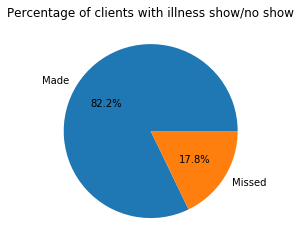

In [18]:
# holds the number of bars to be used in the bar chart
x =np.arange(2)
# set colors for plyplot bars
bar_colors =['lightgreen','lightblue']
# setsup the pie plot with necessary information like labels and where to find the data to display
plt.title('Percentage of clients with illness show/no show')
plt.pie(pct_ill_stats,labels = ('Made','Missed'),autopct='%1.1f%%')
plt;

> The above code sections were used to split the dataset into subsets, then calculations were performed on the subset to understand the numbers of ill patients (pre-existing condition) that made or missed their appointments. I then created a pie chart to show that ill people tended to show up.  This however is only the starting point to really understand if there is a correlation we must compare the above statistical data against the numbers for non ill (healthy) clients to see if people with illnesses are less likely to miss an appointment.

In [19]:
# create a subset to focus only on the clients that don't have a pre-existing condition (healthy).
healthy_clients = df_noshow_data[(df_noshow_data.hipertension == 0) &
                             (df_noshow_data.diabetes == 0) &
                             (df_noshow_data.alcoholism == 0) &
                             (df_noshow_data.handcap == 0)]
# creates two subsets of the healthy clients: those that made their appointments and those that missed their appointments
healthy_made = healthy_clients[healthy_clients.no_show == 0]
healthy_missed = healthy_clients[healthy_clients.no_show == 1]
# store the percentage of healthy clients that made apppointments
pct_healthy_made = healthy_made.no_show.count()/healthy_clients.no_show.count()
# store the percentage of healthy clients that missed appointments
pct_healthy_missed= healthy_missed.no_show.count()/healthy_clients.no_show.count()
# place the percentage calculations above into a list to be used by matlib.pyplot bar chart
pct_healthy_stats = [pct_healthy_made,pct_healthy_missed]
pct_healthy_stats

[0.7907526958423987, 0.20924730415760126]

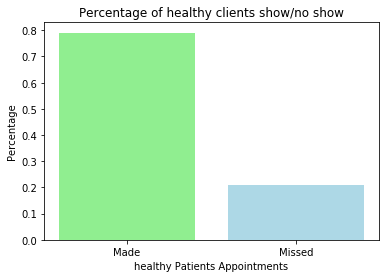

In [20]:
# holds the number of bars to be used in the bar chart
x =np.arange(2)
# setsup the bar plot with necessary information like labels and where to find the data to display
plt.title('Percentage of healthy clients show/no show')
plt.xlabel('healthy Patients Appointments')
plt.ylabel('Percentage')
plt.bar(x,pct_healthy_stats,color = bar_colors)
plt.xticks(x,('Made','Missed'))
plt;

> based on the previous two bar charts there appears to be correlation between people with pre-existing conditions being less likely to miss their appointment and people without pre-existing conditions being more likely to miss appointments.  The next section will hopefully further show this by charting healthy vs ill client missed percentages.

[0.1782839265957041, 0.20924730415760126]


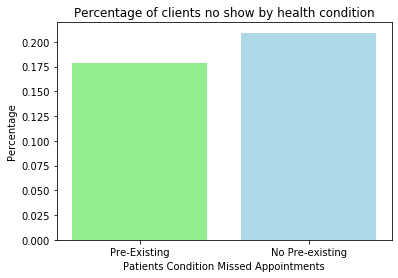

In [21]:
# place the percentage calculations above into a list to be used by matlib.pyplot bar chart
pct_cmb_missed_stats = [pct_ill_missed_appt,pct_healthy_missed]
print(pct_cmb_missed_stats)
# holds the number of bars to be used in the bar chart
x =np.arange(2)
# setsup the bar plot with necessary information like labels and where to find the data to display
plt.title('Percentage of clients no show by health condition')
plt.xlabel('Patients Condition Missed Appointments')
plt.ylabel('Percentage')
plt.bar(x,pct_cmb_missed_stats, color=bar_colors)
plt.xticks(x,('Pre-Existing','No Pre-existing'))
plt;

> The data seems to support my question that having a pre-existing condition negatively correlates to missing an appointment, while also presenting data that not having a pre-existing condition positively correlates to missing an appointment.  The total number of clients without pre-existing conditions was ~76% of the total dataset.  I believe there was enough records in both groups to show correlation.  What I have not done is confirm if any other factors may be influencing the above numbers.  The next question will explore if there is a correlation of missing appointments based on gender.

### Research Question 2  Are females more likely to miss appointments?

In [22]:
#create two subsets: total number of male clients and total number of female clients
tot_male_clients = df_noshow_data[(df_noshow_data.gender == 'M')]
tot_female_clients = df_noshow_data[(df_noshow_data.gender == 'F')]  
#create two more subsets: total number of males that missed appts and total number of females that missed appts
missed_appt_male = df_noshow_data[(df_noshow_data.no_show == 1) &
                                  (df_noshow_data.gender == 'M')]
missed_appt_female = df_noshow_data[(df_noshow_data.no_show == 1) &
                                  (df_noshow_data.gender == 'F')]
#store percentage of males that missed appointments
pct_males_missed = missed_appt_male.no_show.count()/tot_male_clients.no_show.count()
#store percentage of femailes that missed appointments
pct_females_missed = missed_appt_female.no_show.count()/tot_male_clients.no_show.count()
#place percentages calculated above in list to be used by matplotlib.pyplot bar chart
pct_cmb_gender_stats = [pct_males_missed,pct_females_missed]
pct_cmb_gender_stats

[0.1997149889882109, 0.37738048970073845]

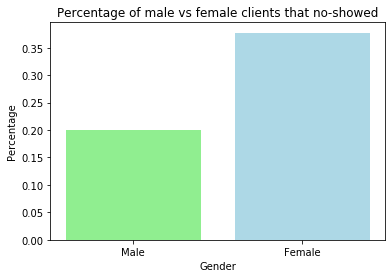

In [23]:
# holds the number of bars to be used in the bar chart
x =np.arange(2)
# setsup the bar plot with necessary information like labels and where to find the data to display
plt.title('Percentage of male vs female clients that no-showed')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.bar(x,pct_cmb_gender_stats, color=bar_colors)
plt.xticks(x,('Male','Female'))
plt;

> The above code cut through the many steps used in question 1 to quickly highlight that females are ~twice as likely to miss an appointment than males.  this quick analysis does not include research into any underlying reasons that may attribute to females missing more appointments than males.  

### Research Question 3  Are people that receive SMS notifications more likely to miss appointments?

In [24]:
#create two subsets clients that made their appointments and clients that missed their appointments
made_appt = df_noshow_data.no_show == 0
missed_appt = df_noshow_data.no_show == 1
#print the average of clients that received a sms message and made their appointment
print('sms_received and made appt: %f' % df_noshow_data.sms_received[made_appt].mean())
#print the average of clients that received an sms and missed their appointment
print('sms received and missed appt: %f' % df_noshow_data.sms_received[missed_appt].mean())

sms_received and made appt: 0.291429
sms received and missed appt: 0.438872


> This is very interesting as I would assume communication with the client would lead to less no shows.  based on the averages this is not the case.  This analysis highlights a quick way to assertain if there may be a correlation between two different data groups (columns).  There could be other underlying circumstances that make this appear to be positively correlated to missing appointments.  To better understand the sms received data would have to be compared to different columns in the dataset.  I am going to ask one more question regarding the neighbourhoods below.

### Research Question 4  Does where a client live have an impact on no shows?

In [25]:
#create a subset of clients that missed their appointments
missed_appt_neighbor = df_noshow_data[df_noshow_data.no_show == 1]
# creates a subset of original dataset grouped by neighborhoods
tot_neighbor_appt = df_noshow_data.groupby('neighbourhood').no_show.count()
# finds the index of neighborhoods with less than 1,000 appointments and use drop method to remove
tot_neighbor_ix =tot_neighbor_appt[(tot_neighbor_appt < 1000)].index
tot_neighbor_appt.drop(tot_neighbor_ix, inplace = True)
# creates subset of data from subset of data for missed appt grouped by neighborhood
missed_neighbor = missed_appt_neighbor.groupby('neighbourhood').no_show.count()
# drops rows from missed_neighbor subset based on neighborhoods with less than 1,000 total appointments
missed_neighbor.drop(tot_neighbor_ix,inplace =True,errors = 'ignore')
#create percentage of missed appointments grouped by neighborhoods
pct_missed_neighbor = missed_neighbor/tot_neighbor_appt
# finds the index of neighborhoods whose miss percentage is below 21% and drop them
pct_neighbor_missed_ix = pct_missed_neighbor[(pct_missed_neighbor < 0.21)].index
pct_missed_neighbor.drop(pct_neighbor_missed_ix,inplace = True)
pct_missed_neighbor

neighbourhood
ANDORINHAS           0.230599
CARATOÍRA            0.230109
CENTRO               0.210511
CRUZAMENTO           0.217454
GURIGICA             0.225966
ILHA DAS CAIEIRAS    0.220244
ILHA DO PRÍNCIPE     0.232846
ITARARÉ              0.262618
JESUS DE NAZARETH    0.243954
MARUÍPE              0.223041
PRAIA DO SUÁ         0.229150
ROMÃO                0.214059
SANTOS DUMONT        0.289639
SÃO JOSÉ             0.215915
SÃO PEDRO            0.210440
Name: no_show, dtype: float64

> There are 81 unique neighborhoods in the original dataset.  The above code reduces the amount of neighborhoods by considering only neighborhoods that would be statisitically significant (neighborhoods with < 1,000 appts scheduled were removed).  This knocked the number of unique neighborhoods to 39.  The next step was to reduce the neighborhoods more by looking for neighborhoods that had no shows at a rate greater than non pre-existing condition client no shows (~21%).  This reduce the number of neighborhoods to 15.  The next code sell will reduce it down to the top 6 neighborhoods for no shows.

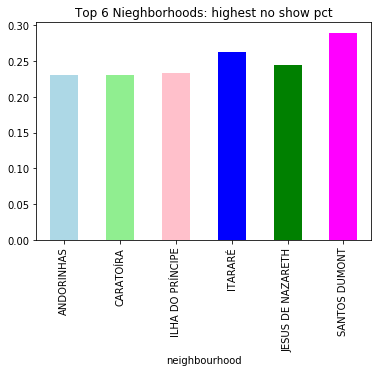

In [26]:
# finds the index of neighborhoods whose miss percentage is below 23% and drop them
pct_neighbor_missed_ix = pct_missed_neighbor[(pct_missed_neighbor < 0.23)].index
pct_missed_neighbor.drop(pct_neighbor_missed_ix,inplace = True)
# create bar chart to display top 6 neighborhoods
pct_missed_neighbor.plot(kind='bar',color = ('lightblue','lightgreen','pink','blue','green','magenta'), title ='Top 6 Nieghborhoods: highest no show pct');

> This last section narrows the neighborhoods to the Top 6 areas where the missed appointment percentage is the greatest (>23%).  There appears to be a correlation with the neighborhood client is located and missing appointments.  At this point it is not a very strong association based on the sheer number of neighborhoods.  To better understand one would need to see if the neighborhoods could be grouped into a wider area.  It would benefit if there was data on clients distance from the hospital.  As stated there appear to be several neighborhoods that have clients miss appointments compared to the overall percentage of missed appointments as a whole.

<a id='conclusions'></a>
## Conclusions
> The findings from the EDA portion indicate there may be something to clients that have pre-existing conditions are not as likely to miss an appointment as clients without pre-existing conditions and that females appear to be more likely to miss an appointment when comparted to males.  The strangest exploration of the data came from studying the mean value of clients that received sms communication from the hospital compared to if client eventually made the appointment or missed the appointment.  The data indicated there may be a link to missing appointment if client receives sms message.  The exploration was very limited and further investigation would be required, possibly understanding what exactly the sms texts are concerning might help better understand if there is a correlation.  I then worked on determining if the area the hospital is located has an affect on no shows.  This was a daunting task and through the exploration I noted variance between neghborhoods and noticed some of them did not have enough appointments to make a significant statistical judgement.  I elemenated the neighborhoods that had less than 1,000 appointments (since the data set was >110,000).  I then decided to look at hostpitals that had no show rates greater than the rate for healthy clients overall (found when answering my 1st question) which is ~21% and found 15 neighborhoods that had no show rates > healthy misses, indicating area may have some significance to rate of no shows.  I ended by highlighting the top 6 neighborhoods with greatest percentage of no shows with the top 1 ~28%.

> I started out thinking the dates may have significance, so I added columns only to realize there was enough columns in original dataset to answer 3/4 questions.  There are further questions I have and the next one was going to be based on time between scheduling and appointment date.  I used spyder to due a quick median test and there appears to be some correlation. The other idea I had was studying the day of the week, but a quick median test seems to indicate there isn't a correlation.  This dataset can be explored in further detail.  A quick median test of the Age (in spyder) indicated older people may miss more appointments.  I hope I have satisfied the needs of this exercise, as I feel the work I did just scratched the surface.
> I am fairly new to Python, so I did spend time in the panda & matplotlib documentation exploring how to present and manipulate the data. Below is the main page.
https://pandas.pydata.org/pandas-docs/stable/reference/index.html
https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py
